In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [20]:
df.isnull().sum() 
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [21]:
# Ensure necessary columns: 'Date', 'Amount', 'Sales Channel' (as proxy for promotions), 'Order ID'
relevant_columns = ['Date', 'Amount', 'Sales Channel']
df= df.dropna(subset=relevant_columns)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
promo_sales = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)
# Calculate total number of orders per Sales Channel
promo_orders = df.groupby('Sales Channel')['Order ID'].nunique()

# Calculate Conversion Rate (Sales per Order)
conversion_rate = (promo_sales / promo_orders).sort_values(ascending=False)

print("\nTop Promotional Campaigns by Sales:")
print(promo_sales.head())

print("\nConversion Rates by Promotional Campaign:")
print(conversion_rate)


Top Promotional Campaigns by Sales:
Sales Channel
Amazon.in    78590170.25
Name: Amount, dtype: float64

Conversion Rates by Promotional Campaign:
Sales Channel
Amazon.in    696.184417
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_8092\2610402506.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


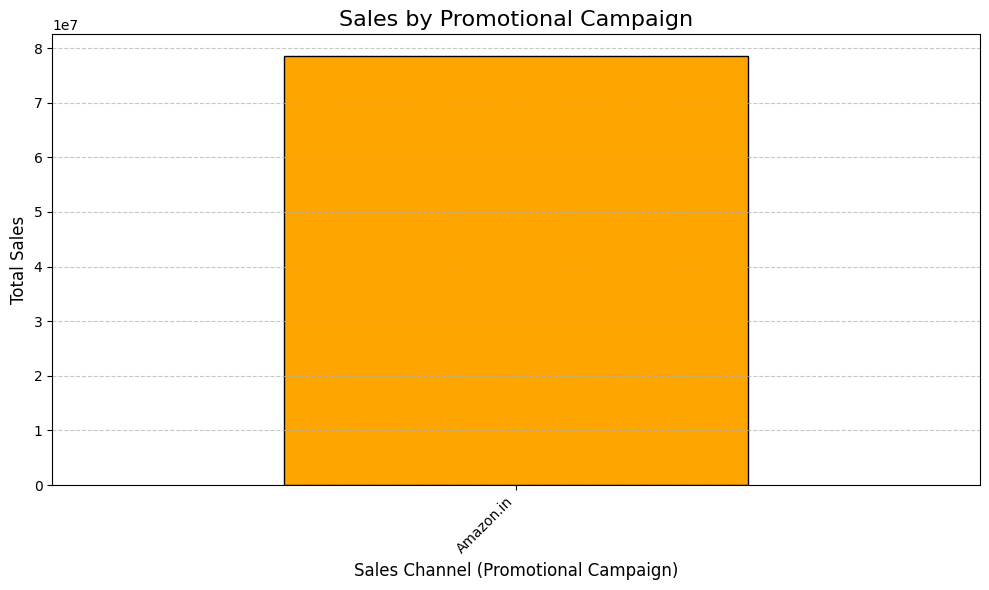

In [22]:
# Bar Graph: Sales by Promotional Campaign
plt.figure(figsize=(10, 6))
promo_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Sales by Promotional Campaign", fontsize=16)
plt.xlabel("Sales Channel (Promotional Campaign)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

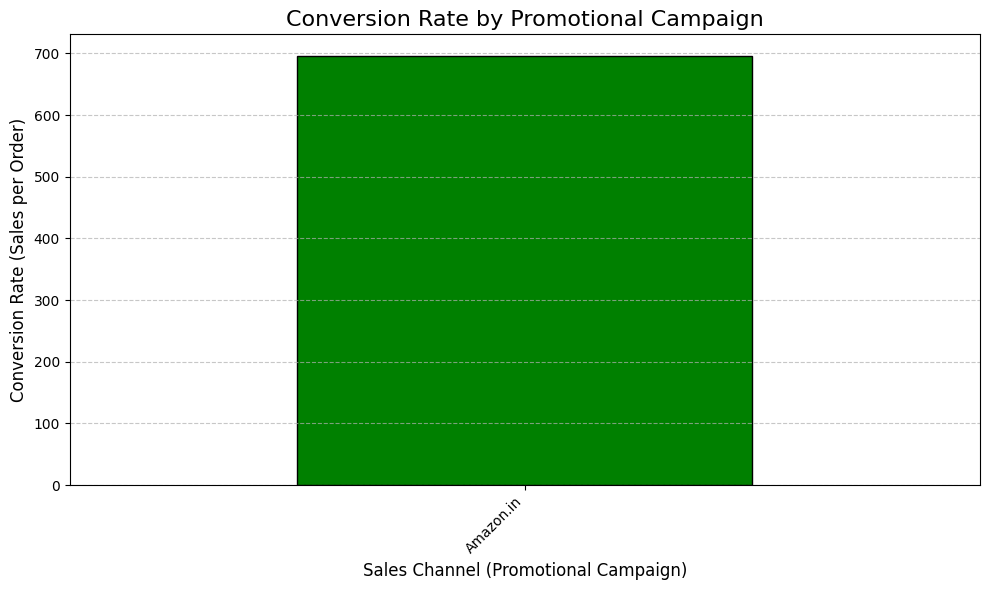

In [23]:
# Bar Graph: Conversion Rate by Promotional Campaign
plt.figure(figsize=(10, 6))
conversion_rate.plot(kind='bar', color='green', edgecolor='black')
plt.title("Conversion Rate by Promotional Campaign", fontsize=16)
plt.xlabel("Sales Channel (Promotional Campaign)", fontsize=12)
plt.ylabel("Conversion Rate (Sales per Order)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

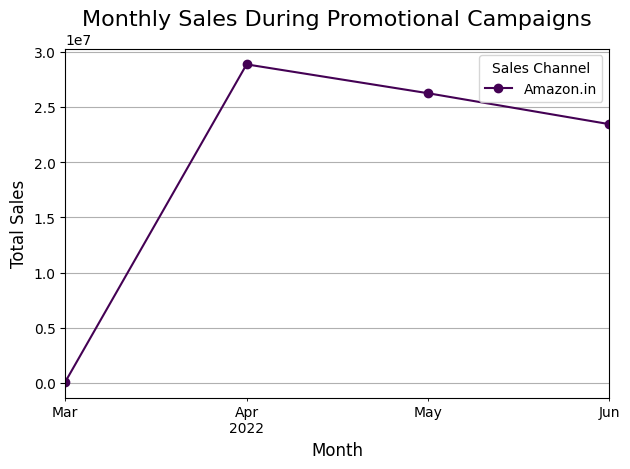

In [24]:
#  Line Graph: Time-Series Sales During Promotions
df['Month'] = df['Date'].dt.to_period('M')
monthly_promo_sales = df.groupby(['Month', 'Sales Channel'])['Amount'].sum().unstack()

plt.figure(figsize=(12, 10))
monthly_promo_sales.plot(kind='line', marker='o', colormap='viridis')
plt.title("Monthly Sales During Promotional Campaigns", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.legend(title="Sales Channel")
plt.tight_layout()
plt.show()


Explanation:
Data Cleaning:

Ensures necessary columns (Date, Amount, and Sales Channel) are available.
Drops rows with missing values in critical columns.
Promo Sales Analysis:

Groups data by Sales Channel to calculate total sales for each campaign.
Identifies the top promotional campaigns driving the most sales.
Conversion Rate Calculation:

Calculates conversion rate as Total Sales / Number of Orders per promotional campaign.
Visualizations:

Bar Graph (Sales by Campaign): Highlights total sales driven by each promotional campaign.
Bar Graph (Conversion Rate): Shows effectiveness in converting leads into sales.
Line Graph (Monthly Sales Trends): Tracks sales trends for campaigns over time.